Multiple Regression
-------

![](https://cdn.meme.am/cache/instances/folder501/500x/65448501.jpg)

A company that makes carseats would like to construct a model to predict sales. 

The data is here: https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv 

It contains 400 observations on the following 11 variables:

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

-----

Load in datasets

In [14]:
import pandas as pd
carseat_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv')

In [15]:
# Replace ShelveLocation with dummies
shelve_loc = pd.get_dummies(carseat_data['ShelveLoc'], drop_first=True)
shelve_loc.columns = ['Good_shelfloc', 'Medium_shelfloc']
carseat_data.drop(columns='ShelveLoc', inplace=True)
carseat_data = carseat_data.join(shelve_loc)

In [16]:
# Replace US with dummies
shelve_loc = pd.get_dummies(carseat_data['US'], drop_first=True)
shelve_loc.columns = ['US_No']
carseat_data.drop(columns='US', inplace=True)
carseat_data = carseat_data.join(shelve_loc)

In [17]:
# Replace Urban with dummies
shelve_loc = pd.get_dummies(carseat_data['Urban'], drop_first=True)
shelve_loc.columns = ['Urban_No']
carseat_data.drop(columns='Urban', inplace=True)
carseat_data = carseat_data.join(shelve_loc)

In [18]:
carseat_data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Good_shelfloc,Medium_shelfloc,US_No,Urban_No
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1
5,10.81,124,113,13,501,72,78,16,0,0,1,0
6,6.63,115,105,0,45,108,71,15,0,1,0,1
7,11.85,136,81,15,425,120,67,10,1,0,1,1
8,6.54,132,110,0,108,124,76,10,0,1,0,0
9,4.69,132,113,0,131,124,76,17,0,1,1,0


Visualize the data with the appropriate plots. 

In [19]:
# For example
pd.plotting.scatter_matrix(carseat_data, figsize=(17, 10), edgecolor='none', alpha=0.5);

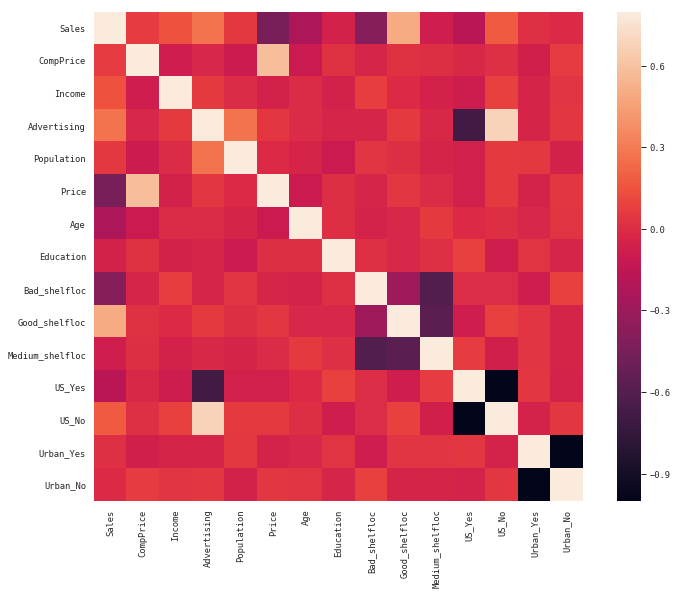

In [20]:
#correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context="paper", font="monospace")
corrmat = carseat_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(260, 10, as_cmap=True)
# # Drawing the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True);

What trends do you see in the data?

I see linear coorelation between: Price and Sales, Price and CompPrice

Find the single best predictor for a simple linear regression.

<br>

<details><summary>
Click here for a hint…
</summary>
Fit a linear model to all possible explanatory variables and pick best one.
</details>

In [20]:
import statsmodels.api as sms
r2_list =[]
for col in carseat_data.columns[1:]:
    x = carseat_data[col]
    x = sms.add_constant(x)
    y = carseat_data['Sales']
    model = sms.OLS(y, x)
    result = model.fit()
    r2_list.append(result.rsquared)
    print('The R2 - Value for a SLG with %s and Sales = %.4f' %(col, result.rsquared))
print('Best r2-value = %.4f' % max(r2_list))

The R2 - Value for a SLG with CompPrice and Sales = 0.0041
The R2 - Value for a SLG with Income and Sales = 0.0231
The R2 - Value for a SLG with Advertising and Sales = 0.0726
The R2 - Value for a SLG with Population and Sales = 0.0025
The R2 - Value for a SLG with Price and Sales = 0.1980
The R2 - Value for a SLG with Age and Sales = 0.0537
The R2 - Value for a SLG with Education and Sales = 0.0027
The R2 - Value for a SLG with Good_shelfloc and Sales = 0.2505
The R2 - Value for a SLG with Medium_shelfloc and Sales = 0.0055
The R2 - Value for a SLG with US_No and Sales = 0.0314
The R2 - Value for a SLG with Urban_No and Sales = 0.0002
Best r2-value = 0.2505


Fit a the most possible multiple regression.

In [21]:
x = carseat_data.iloc[:,1:]
x = sms.add_constant(x)
y = carseat_data['Sales']
model = sms.OLS(y, x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          1.60e-166
Time:                        21:26:01   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.6606      0.603      9.380      0.000       4.474       6.847
CompPrice           0.0928      0.004     22.378      0.000       0.085       0.101
Income              0.0158      0.002      8.565      0.000       0.012       0.019
Advertising         0.1231      0.011     11.066      0.000       0.101       0.145
Population          0.0002      0.000      0.561      0.575      -0.001       0.001
Price              -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education          -0.0211      0.020     -1.070      0.285      -0.060       0.018
Good_shelfloc       4.8502      0.153     31.678      0.000       4.549       5.151
Medium_shelfloc     1.9567      0.126     15.516      0.000       1.709       2.205
US_No              -0.1841      0.150     -1.229      0.220      -0.479       0.111
Urban_No            0.1229      0.113      1.088      0.277      -0.099       0.345
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How does the $R^2$ compare better best simple and most complex

Best simple has almost the same R-squared value, but has with 420.7 a much better F-statistic value.

In [22]:
x = carseat_data.loc[:,['CompPrice', 'Income', 'Advertising', 'Price', 'Good_shelfloc', 'Medium_shelfloc', 'Age']]
x = sms.add_constant(x)
y = carseat_data['Sales']
model = sms.OLS(y, x)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Mon, 28 Oct 2019   Prob (F-statistic):          1.25e-170
Time:                        21:26:16   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.4752      0.505     10.842      0.000       4.482       6.468
CompPrice           0.0926      0.004     22.451      0.000       0.084       0.101
Income              0.0158      0.002      8.590      0.000       0.012       0.019
Advertising         0.1159      0.008     15.006      0.000       0.101       0.131
Price              -0.0953      0.003    -35.699      0.000      -0.101      -0.090
Good_shelfloc       4.8357      0.152     31.710      0.000       4.536       5.135
Medium_shelfloc     1.9520      0.125     15.569      0.000       1.706       2.198
Age                -0.0461      0.003    -14.521      0.000      -0.052      -0.040
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Remove a couple of explanatory variables. How does $R^2$ change?

What is the best criteria for removing variables?

In [ ]:
low p value

Repeated the process for the adjusted $R^2$ 

Comparing adjusted r2 value from the most possible model compared to the best simple model does not change alot. I would expect that the adjusted r2 value punishes the high number of feature more. From this brief experiment I'm assuming its adjustment considering model complexity is not very strong.

Write a brief summary of results.

<br>

<details><summary>
Click here for a hint…
</summary>
Don't write every step. Just pick the most useful model.
</details>
   

<br>
<br> 
<br>

----